# (Approach 1 of 3): Return prediction using Tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('addedcolumns.csv')
data['timestamp'] = pd.to_numeric(data['timestamp'], errors='coerce')
data = data.reset_index(drop=True)

In [3]:
data.head()

,BINANCE_BTC-USDT_ask_1,BINANCE_BTC-USDT_askq_1,BINANCE_BTC-USDT_bid_1,BINANCE_BTC-USDT_bidq_1,BINANCE_BTC-USDT_ask_2,BINANCE_BTC-USDT_askq_2,BINANCE_BTC-USDT_bid_2,BINANCE_BTC-USDT_bidq_2,BINANCE_BTC-USDT_ask_3,BINANCE_BTC-USDT_askq_3,...,Sell_Orders_No_Cancelled,Sum_Sell_Order_Prices_Cancelled,Total_Qty_Sell_Orders_Cancelled,Buy_Orders_No_Cancelled,Sum_Buy_Order_Prices_Cancelled,Total_Qty_Buy_Orders_Cancelled,No_of_Trades,Trade_Price_Sum,Trade_Qty_Sum,LTP
0,103800,1105,103715,20,103900,1907,103700,2,103940,1000,...,0,0,0,50,0,0,380,39444000,41483,103800
1,103800,1105,103715,20,103900,1907,103700,2,103940,1000,...,0,0,0,50,0,0,380,39444000,41483,103800
2,103800,1105,103715,20,103900,1907,103700,2,103940,1000,...,0,0,0,50,0,0,380,39444000,41483,103800
3,103800,1105,103715,20,103900,1907,103700,2,103940,1000,...,0,0,0,50,0,0,380,39444000,41483,103800
4,103800,1105,103715,20,103900,1907,103700,2,103940,1000,...,0,0,0,50,0,0,380,39444000,41483,103800


In [5]:
Time = data.pop('timestamp')

Date_Time = Time
Date_Time = pd.to_numeric(Date_Time, errors='coerce')
Date_Time = pd.to_datetime(Date_Time, unit = 'ms')

In [6]:
col = list(data)
col1 = col[0:40]
for i in col:
    data[i] = pd.to_numeric(data[i], errors='coerce')

In [28]:
col

['BINANCE_BTC-USDT_ask_1',
 'BINANCE_BTC-USDT_askq_1',
 'BINANCE_BTC-USDT_bid_1',
 'BINANCE_BTC-USDT_bidq_1',
 'BINANCE_BTC-USDT_ask_2',
 'BINANCE_BTC-USDT_askq_2',
 'BINANCE_BTC-USDT_bid_2',
 'BINANCE_BTC-USDT_bidq_2',
 'BINANCE_BTC-USDT_ask_3',
 'BINANCE_BTC-USDT_askq_3',
 'BINANCE_BTC-USDT_bid_3',
 'BINANCE_BTC-USDT_bidq_3',
 'BINANCE_BTC-USDT_ask_4',
 'BINANCE_BTC-USDT_askq_4',
 'BINANCE_BTC-USDT_bid_4',
 'BINANCE_BTC-USDT_bidq_4',
 'BINANCE_BTC-USDT_ask_5',
 'BINANCE_BTC-USDT_askq_5',
 'BINANCE_BTC-USDT_bid_5',
 'BINANCE_BTC-USDT_bidq_5',
 'BINANCE_BTC-USDT_ask_6',
 'BINANCE_BTC-USDT_askq_6',
 'BINANCE_BTC-USDT_bid_6',
 'BINANCE_BTC-USDT_bidq_6',
 'BINANCE_BTC-USDT_ask_7',
 'BINANCE_BTC-USDT_askq_7',
 'BINANCE_BTC-USDT_bid_7',
 'BINANCE_BTC-USDT_bidq_7',
 'BINANCE_BTC-USDT_ask_8',
 'BINANCE_BTC-USDT_askq_8',
 'BINANCE_BTC-USDT_bid_8',
 'BINANCE_BTC-USDT_bidq_8',
 'BINANCE_BTC-USDT_ask_9',
 'BINANCE_BTC-USDT_askq_9',
 'BINANCE_BTC-USDT_bid_9',
 'BINANCE_BTC-USDT_bidq_9',
 'BINANCE_

In [7]:
df = pd.DataFrame(columns=col)
df_slope = pd.DataFrame(columns=col1)

In [8]:
tmp = []
slope = []

for var in col:
    
    for i in range(0, len(data), 10):
        if (i + 9) > len(data) - 1:
            break
        up = i + 9
        
        down = i
        
        tmp.append(np.mean(data[var][i : i + 10]))
    
    df[var] = tmp
    tmp = []


for var in col1:
    
    for i in range(0, len(data), 10):
        if (i + 9) > len(data) - 1:
            break
        up = i + 9
        
        down = i
        
        slope.append((data[var][up] - data[var][down]) / 1) 
    
    df_slope[var] = slope
    slope = []



df_slope.columns = [str(col1_) + '_slope' for col1_ in df_slope.columns]

In [9]:
df['b_a_spread'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_bid_1']

df['b12'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_2']
df['b13'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_3']
df['b14'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_4']
df['b15'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_5']
df['b16'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_6']
df['b17'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_7']
df['b18'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_8']
df['b19'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_9']
df['b1ten'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_10']

df['aten1'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_2']
df['aten2'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_3']
df['aten3'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_4']
df['aten4'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_5']
df['aten5'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_6']
df['aten6'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_7']
df['aten7'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_8']
df['aten8'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_9']
df['aten9'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_10']


Total_P_ask = df['BINANCE_BTC-USDT_ask_1']+df['BINANCE_BTC-USDT_ask_10']+df['BINANCE_BTC-USDT_ask_2']+df['BINANCE_BTC-USDT_ask_3']+df['BINANCE_BTC-USDT_ask_4']+df['BINANCE_BTC-USDT_ask_5']+df['BINANCE_BTC-USDT_ask_6']+df['BINANCE_BTC-USDT_ask_7']+df['BINANCE_BTC-USDT_ask_8']+df['BINANCE_BTC-USDT_ask_9']
Total_P_bid = df['BINANCE_BTC-USDT_bid_1']+df['BINANCE_BTC-USDT_bid_10']+df['BINANCE_BTC-USDT_bid_2']+df['BINANCE_BTC-USDT_bid_3']+df['BINANCE_BTC-USDT_bid_4']+df['BINANCE_BTC-USDT_bid_5']+df['BINANCE_BTC-USDT_bid_6']+df['BINANCE_BTC-USDT_bid_7']+df['BINANCE_BTC-USDT_bid_8']+df['BINANCE_BTC-USDT_bid_9']

Total_V_ask = df['BINANCE_BTC-USDT_askq_1']+df['BINANCE_BTC-USDT_askq_10']+df['BINANCE_BTC-USDT_askq_2']+df['BINANCE_BTC-USDT_askq_3']+df['BINANCE_BTC-USDT_askq_4']+df['BINANCE_BTC-USDT_askq_5']+df['BINANCE_BTC-USDT_askq_6']+df['BINANCE_BTC-USDT_askq_7']+df['BINANCE_BTC-USDT_askq_8']+df['BINANCE_BTC-USDT_askq_9']
Total_V_bid = df['BINANCE_BTC-USDT_bidq_1']+df['BINANCE_BTC-USDT_bidq_10']+df['BINANCE_BTC-USDT_bidq_2']+df['BINANCE_BTC-USDT_bidq_3']+df['BINANCE_BTC-USDT_bidq_4']+df['BINANCE_BTC-USDT_bidq_5']+df['BINANCE_BTC-USDT_bidq_6']+df['BINANCE_BTC-USDT_bidq_7']+df['BINANCE_BTC-USDT_bidq_8']+df['BINANCE_BTC-USDT_bidq_9']

df['acc_diff_P'] = Total_P_ask - Total_P_bid
df['acc_diff_v'] = Total_V_ask - Total_V_bid
df['mean_P_ask'] = Total_P_ask / 10
df['mean_P_bid'] = Total_P_bid / 10
df['mean_V_ask'] = Total_V_ask / 10
df['mean_V_bid'] = Total_V_bid / 10

df['mid_p_Y'] = (df['BINANCE_BTC-USDT_ask_1'] + df['BINANCE_BTC-USDT_bid_1']) / 2

In [10]:
df = pd.concat((df, df_slope), axis = 1)

df['mid_p_Y'] = df['mid_p_Y'].shift(-1)
df = df[:-1]

X = df.drop('mid_p_Y', 1)
y = pd.DataFrame(df['mid_p_Y'])

X_train = X[:-1000]
X_test =  X[-1000:]
y_train = y[:-1000]
y_test =  y[-1000:]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train),
                       columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),
                      columns = X_test.columns,index=X_test.index)


In [11]:
import tensorflow as tf

C:\Users\Anurag\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [12]:
X.shape

(13402, 121)

In [13]:
D = dict()
for var in X.columns:
    D[var] = tf.feature_column.numeric_column(var)

In [14]:
feat_cols = []

for key in D.keys():
    feat_cols.append(D[key])


In [15]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,
                                                 batch_size=10,
                                                 num_epochs=1000, shuffle=False)

In [16]:
model = tf.estimator.DNNRegressor(hidden_units=[121, 61, 30, 15, 7],
                                  feature_columns=feat_cols)
model.train(input_fn=input_func,steps=25000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Anurag\\AppData\\Local\\Temp\\tmplgj7ry2e', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000012E9508D710>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Anurag\A

INFO:tensorflow:global_step/sec: 70.4416
INFO:tensorflow:loss = 27601672.0, step = 7201 (1.420 sec)
INFO:tensorflow:global_step/sec: 69.7747
INFO:tensorflow:loss = 13108142.0, step = 7301 (1.527 sec)
INFO:tensorflow:global_step/sec: 41.518
INFO:tensorflow:loss = 3024576.0, step = 7401 (2.304 sec)
INFO:tensorflow:global_step/sec: 53.141
INFO:tensorflow:loss = 30521568.0, step = 7501 (1.877 sec)
INFO:tensorflow:global_step/sec: 70.1024
INFO:tensorflow:loss = 123303030.0, step = 7601 (1.431 sec)
INFO:tensorflow:global_step/sec: 70.4125
INFO:tensorflow:loss = 1658060.4, step = 7701 (1.416 sec)
INFO:tensorflow:global_step/sec: 69.7658
INFO:tensorflow:loss = 676921.2, step = 7801 (1.433 sec)
INFO:tensorflow:global_step/sec: 69.4025
INFO:tensorflow:loss = 10119456.0, step = 7901 (1.441 sec)
INFO:tensorflow:global_step/sec: 68.9967
INFO:tensorflow:loss = 3323584.2, step = 8001 (1.449 sec)
INFO:tensorflow:global_step/sec: 70.1335
INFO:tensorflow:loss = 13208938.0, step = 8101 (1.430 sec)
INFO:t

INFO:tensorflow:loss = 2559224.5, step = 15401 (1.486 sec)
INFO:tensorflow:global_step/sec: 70.186
INFO:tensorflow:loss = 293784.9, step = 15501 (1.440 sec)
INFO:tensorflow:global_step/sec: 69.4292
INFO:tensorflow:loss = 834547.4, step = 15601 (1.425 sec)
INFO:tensorflow:global_step/sec: 69.0736
INFO:tensorflow:loss = 3145470.5, step = 15701 (1.448 sec)
INFO:tensorflow:global_step/sec: 70.1352
INFO:tensorflow:loss = 2639857.0, step = 15801 (1.441 sec)
INFO:tensorflow:global_step/sec: 69.5462
INFO:tensorflow:loss = 2517850.8, step = 15901 (1.422 sec)
INFO:tensorflow:global_step/sec: 68.0713
INFO:tensorflow:loss = 975616.6, step = 16001 (1.469 sec)
INFO:tensorflow:global_step/sec: 65.762
INFO:tensorflow:loss = 2629761.0, step = 16101 (1.521 sec)
INFO:tensorflow:global_step/sec: 69.6747
INFO:tensorflow:loss = 15635770.0, step = 16201 (1.451 sec)
INFO:tensorflow:global_step/sec: 69.4259
INFO:tensorflow:loss = 142004980.0, step = 16301 (1.425 sec)
INFO:tensorflow:global_step/sec: 69.6667
IN

INFO:tensorflow:global_step/sec: 48.3437
INFO:tensorflow:loss = 5054115.5, step = 23701 (2.068 sec)
INFO:tensorflow:global_step/sec: 48.0508
INFO:tensorflow:loss = 1378825.8, step = 23801 (2.086 sec)
INFO:tensorflow:global_step/sec: 52.009
INFO:tensorflow:loss = 1458342.4, step = 23901 (1.926 sec)
INFO:tensorflow:global_step/sec: 57.0037
INFO:tensorflow:loss = 687598.0, step = 24001 (1.745 sec)
INFO:tensorflow:global_step/sec: 59.2233
INFO:tensorflow:loss = 1313446.0, step = 24101 (1.708 sec)
INFO:tensorflow:global_step/sec: 45.4667
INFO:tensorflow:loss = 67817.8, step = 24201 (2.180 sec)
INFO:tensorflow:global_step/sec: 40.5943
INFO:tensorflow:loss = 171034.34, step = 24301 (2.467 sec)
INFO:tensorflow:global_step/sec: 50.0923
INFO:tensorflow:loss = 1619970.1, step = 24401 (1.988 sec)
INFO:tensorflow:global_step/sec: 53.0232
INFO:tensorflow:loss = 1684045.0, step = 24501 (1.882 sec)
INFO:tensorflow:global_step/sec: 63.2865
INFO:tensorflow:loss = 3745347.0, step = 24601 (1.596 sec)
INFO

In [17]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                         batch_size=10,
                                                         num_epochs=1,
                                                         shuffle=False)

In [18]:
pred_gen = model.predict(predict_input_func)
predictions = list(pred_gen)

final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Anurag\AppData\Local\Temp\tmplgj7ry2e\model.ckpt-25000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,final_preds)**0.5

11059.273871681122

In [20]:
result = []
for var in range(len(final_preds)):
    result.append(final_preds[var][0])

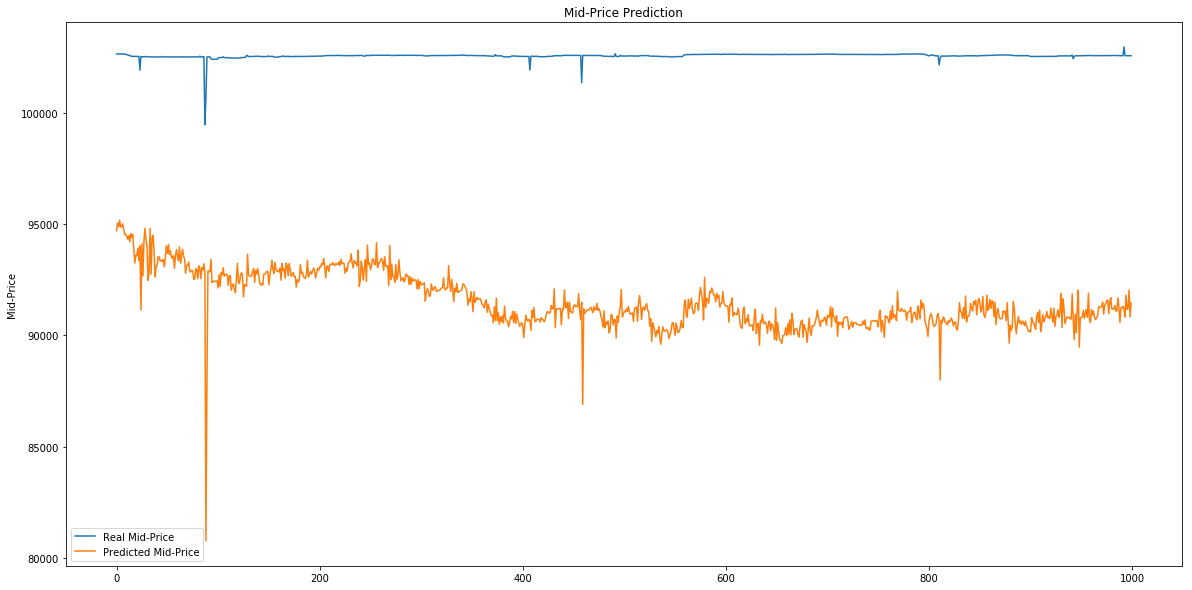

In [21]:
plt.figure(figsize=(20,10))
plt.plot(y_test.values, label = 'Real Mid-Price')
plt.plot(result, label = 'Predicted Mid-Price')
plt.title('Mid-Price Prediction')
plt.ylabel('Mid-Price')
plt.legend()
plt.show()

In [22]:
##############################  Returns on predicted  #########################################

div = []
ret = []
log_ret = []
ret_bps=[]

for i in range(1, len(result)):
    div.append(result[i] / result[i-1])


for i in range(0, len(div)):
    ret.append(div[i] - 1)
    log_ret.append(np.log(div[i])) 

for i in range(len(ret)):
    ret_bps.append(ret[i]*10000)

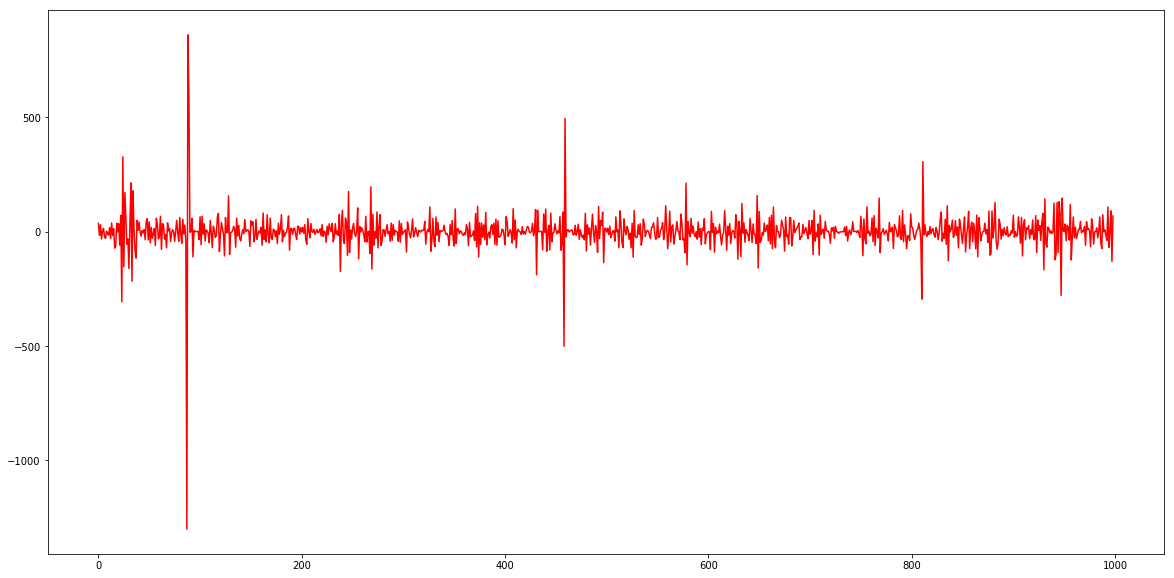

"\ndf_slope['BINANCE_BTC-USDT_ask_1_slope'].plot(figsize=(40,10))\ndf['BINANCE_BTC-USDT_ask_1'].plot(secondary_y=True, figsize=(40,10))\nplt.title('Predicted BPS')\nplt.xlabel('Time')\nplt.ylabel('BPS')\nplt.show()"

In [23]:
##############################  Plot predicted BPS  #########################################
plt.figure(figsize=(20,10))
plt.plot(ret_bps, color = 'red', label = 'BPS')
plt.show()
"""
df_slope['BINANCE_BTC-USDT_ask_1_slope'].plot(figsize=(40,10))
df['BINANCE_BTC-USDT_ask_1'].plot(secondary_y=True, figsize=(40,10))
plt.title('Predicted BPS')
plt.xlabel('Time')
plt.ylabel('BPS')
plt.show()"""

In [24]:
##############################  Predicted Profits  #########################################

Profit = []

ask_test = df['BINANCE_BTC-USDT_ask_1'][-999:].values
bid_test = df['BINANCE_BTC-USDT_bid_1'][-999:].values

buy = 0
sel = 0

for i in range(len(ret_bps)):
    
    if ret_bps[i] > 12 and buy == 0:
        BP = bid_test[i]
        print("Bought at ", BP)
        buy = 1
    
    elif ret_bps[i] < -12 and buy == 1:
        SP = ask_test[i]
        print("Sold at ", SP)
        #print("                        Profit = ", (SP - BP)*100/BP, "%")
        #print()
        Profit.append((SP - BP)*100/BP)
        buy = 0

Profit_Sum = np.sum(Profit)

Positive = [ 1 for i in Profit if i>0]

Bought at  102625.0
Sold at  102650.0
Bought at  102625.0
Sold at  102650.0
Bought at  102625.0
Sold at  102650.0
Bought at  102550.0
Sold at  102615.0
Bought at  102520.5
Sold at  102569.5
Bought at  102510.0
Sold at  102550.0
Bought at  102500.0
Sold at  102546.5
Bought at  102500.0
Sold at  101326.5
Bought at  102500.0
Sold at  102533.0
Bought at  102500.0
Sold at  102525.0
Bought at  102500.0
Sold at  102508.5
Bought at  102500.0
Sold at  102505.0
Bought at  102500.0
Sold at  102505.0
Bought at  102500.0
Sold at  102505.0
Bought at  102500.0
Sold at  102505.0
Bought at  102500.0
Sold at  102505.0
Bought at  102500.0
Sold at  102505.0
Bought at  102500.0
Sold at  102505.0
Bought at  102504.0
Sold at  102507.0
Bought at  102500.0
Sold at  102505.0
Bought at  102500.0
Sold at  102505.0
Bought at  102519.0
Sold at  102504.5
Bought at  102500.0
Sold at  102504.5
Bought at  102500.0
Sold at  102505.0
Bought at  102500.0
Sold at  102341.0
Bought at  102450.0
Sold at  102501.5
Bought at  1

In [25]:
np.sum(Positive)

226